In [29]:
import numpy as np
import pandas as pd
import os, glob
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [16]:
path = glob.glob("raw_data/*.tsv")
thr = [0.0]
for m in thr:
    for n in range (0,len(path)):
        dis = pd.read_csv(path[n], delimiter = '\t')
        dis = dis[['symbol', 'objectObject']]  # Take gene symbol and column containing genetic association score
        dis = dis[dis['objectObject']>m]  # Filter based on chosen risk threshold 
        dis['disease'] = glob.glob("raw_data/*.tsv")[n].split("\\")[1].split("_")[0]  # get disease name
        dis.rename(columns = {'objectObject': 'genetic association'}, inplace = True)
        if np.shape(dis)[0]>10:
                if n==0:
                    alldis = dis
                else:
                    alldis = pd.concat([alldis, dis]).fillna(0)
        else:
            print(disease, " doesn't have enough genes with high genetic scores.")


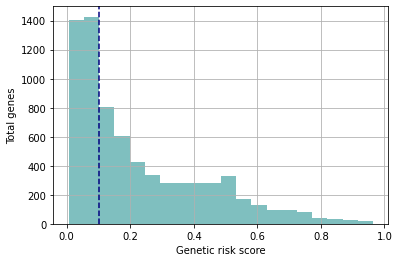

In [51]:
alldis['genetic association'].hist(bins = 20, color = 'teal', alpha = 0.5)
plt.axvline(x = 0.1, color = 'navy', linestyle = '--')
plt.xlabel('Genetic risk score')
plt.ylabel('Total genes')
plt.savefig('plots/00-Prechecks/Distribution_GENESxSCORES.png', dpi = 300)
plt.show()